In [24]:
import cv2
import numpy as np
import os
import glob

In [25]:
from google.colab.patches import cv2_imshow

In [26]:
CHECKERBOARD= (6, 9)

In [27]:
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


In [28]:
objpoints=[]
imgpoints= []
objp = np.zeros((1, CHECKERBOARD[0] *
                   CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

In [29]:
images = glob.glob('*.jpg')

In [30]:
for image in images:
    img = cv2.imread(image)
    gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(
                    gray, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)






In [31]:
if img is None:
    print("Error: Image not found or could not be loaded.")

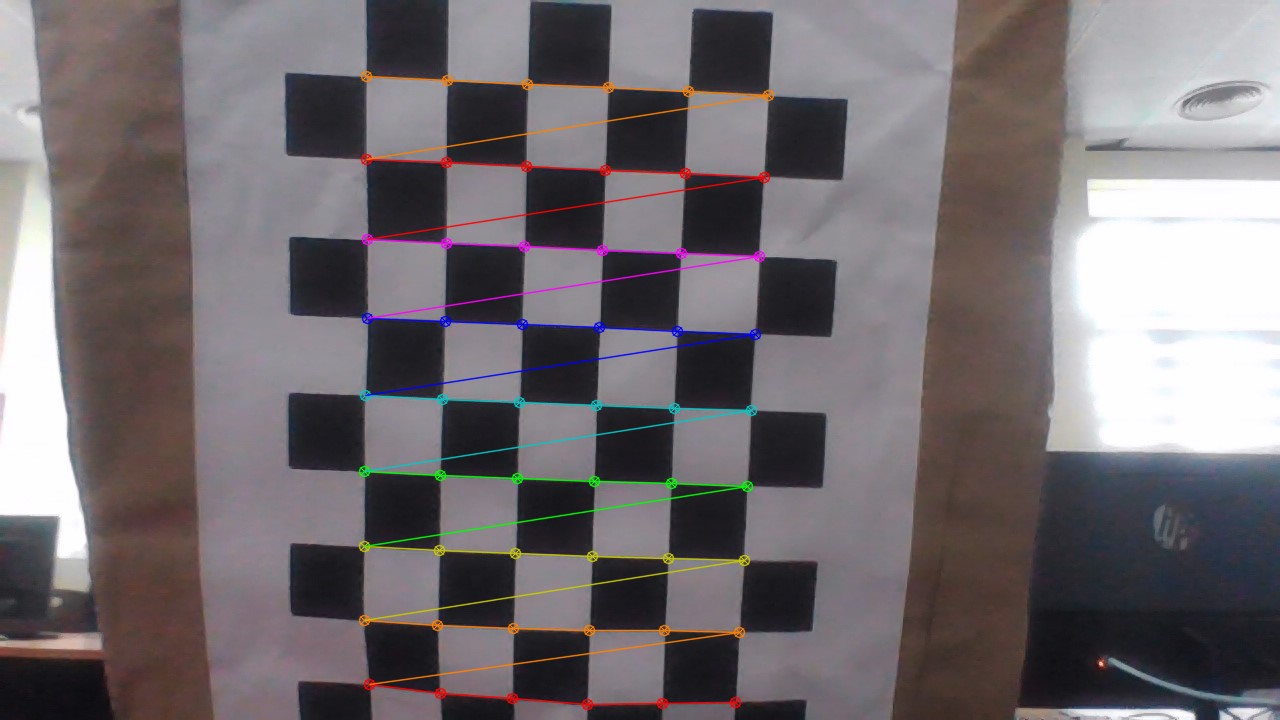

In [32]:
if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(
            gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        img= cv2.drawChessboardCorners(img,
                                          CHECKERBOARD,
                                          corners2, ret)
cv2_imshow(img)





In [33]:
h, w = img.shape[:2]

ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None)

print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

 Camera matrix:
[[1.58814544e+03 0.00000000e+00 6.72082910e+02]
 [0.00000000e+00 1.60864202e+03 3.13118579e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[-3.58397428e-01  1.36698542e+01 -1.67329262e-02  5.22120331e-03
  -1.29502845e+02]]

 Rotation Vectors:
(array([[ 0.0695877 ],
       [ 0.21039627],
       [-3.0940022 ]]),)
